# Lab 5: Model Selection, Cross Validation and Regularization

In  this session, we will use some already seen datasets to illustrate important techniques like validation and regularization. First, we come back to the student "exams" dataset to understand the need of testing data in addition to the training data.  

Then, we will illustrate the under-fitting and over-fitting phenomenas on randomly generated data. After that, we will select a model that fits the best our cross validation data.  

Finally, we will implement regularization technique on the "Microchip" testing dataset. Thus, we could understand how this technique helps to prevent over-fitting. 

### Train and Test data: Student "exams" dataset
In this section, we will train a logistic classifier on the training data of student "exams" dataset. Then, we will predict the student admission of the test data and compare the accuracy of the classifier on the training and test data.

<font color="blue">**Question 1: **</font>The *"exams_train_data.txt"* file contains 3 columns that represent the exam 1, exam 2 scores and the results of 100 students (0: Not admitted, 1: Admitted). 
- Load train data from "exams_train_data.txt" file in "students_results_train" variable and check its size. (use [loadtxt](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.loadtxt.html) function from numpy library)
- Implement the "Poly_Features" function that concatenates to data array the different possible powers (below deg) and interaction terms of feature vectors f1 and f2 as shown below:$$data=[data,~f_1,~ f_2,~ f_1^2,~ f_1\times f_2,~ f_2^2,~ \dots,~ f_1^{deg},~ f_1^{deg-1}\times f_2,~\dots,~ f_2^{deg}]$$



In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fmin_bfgs

#load training data
students_results_train = np.loadtxt('exams_train_data.txt',delimiter='\t')  # ** your code here** 

# you could verify the size of the data using shape() function on numpy array house_data
print("The training data contains {0} student results. There are {1} columns for each exam score and 1 column for admission".format(students_results_train.shape[0],students_results_train.shape[1]-1))

def Poly_Features(data,f1,f2,deg):
    # ** your code here**
    '''
    for i in range(1,deg+1):
        data = np.concatenate((data,f1**i),axis=1)
    for j in range(1,deg+1):
        data = np.concatenate((data,f2**j),axis=1)
    '''
    for i in range(1,deg+1):
        for j in range(i+1):
             data = np.concatenate((data,f1**(i-j)*f2**j),axis=1)
                
    return data


m_train = students_results_train.shape[0] # number of student
x_1_train = students_results_train[:,0,np.newaxis] # we add np.newaxis in the indexing to obtain an array 
x_2_train = students_results_train[:,1,np.newaxis] # with shape (100,1) instead of (100,)
y_train = students_results_train[:,2,np.newaxis] # the student admission result vector

# add polynomial features to the array data X
degree=2  # degree of polynomial feature
X_train=np.ones((m_train,1))   # initialize X array
X_train = Poly_Features(X_train,x_1_train,x_2_train,degree)  
n = X_train.shape[1]  # number of features
print("The number of features is: ",n)

# define sigmoid function for logistic regression hypothesis 
def sigmoid(z):
    return np.ones(z.shape)/(1+np.exp(-z))

# define logistic cost function (inspired from max likelihood)
def cost_func(theta):
    J=np.sum(-y_train*np.log(sigmoid(np.dot(X_train,theta[:,np.newaxis]))))-np.sum((1-y_train)*np.log(1-sigmoid(np.dot(X_train,theta[:,np.newaxis]))))
    return J/m_train  

# define the gradient of logistic cost function 
def grad_cost_func(theta):
    g=(1/m_train)*(np.dot(X_train.transpose(),(sigmoid(np.dot(X_train,theta[:,np.newaxis]))-y_train)))  # this is the vectorized implementation
    g.shape=(g.shape[0],)
    return g  

# calculate the optimal theta
theta0=np.zeros((n,),dtype=float)
theta_opt= fmin_bfgs(cost_func,theta0,fprime=grad_cost_func,disp=0)

The training data contains 100 student results. There are 2 columns for each exam score and 1 column for admission
The number of features is:  6


/home/sbenamor/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:44: RuntimeWarning: divide by zero encountered in log
/home/sbenamor/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:44: RuntimeWarning: invalid value encountered in multiply
/home/sbenamor/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:44: RuntimeWarning: divide by zero encountered in log
/home/sbenamor/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:44: RuntimeWarning: invalid value encountered in multiply


<font color="blue">**Question 2: **</font>
- Predict "y_pred_train" the admission result of each student on train data.
- Calculate the training accuracy (number of good prediction/number of all student) on the training data.

The accuracy on the training data is: 98.0 %


<IPython.core.display.Javascript object>


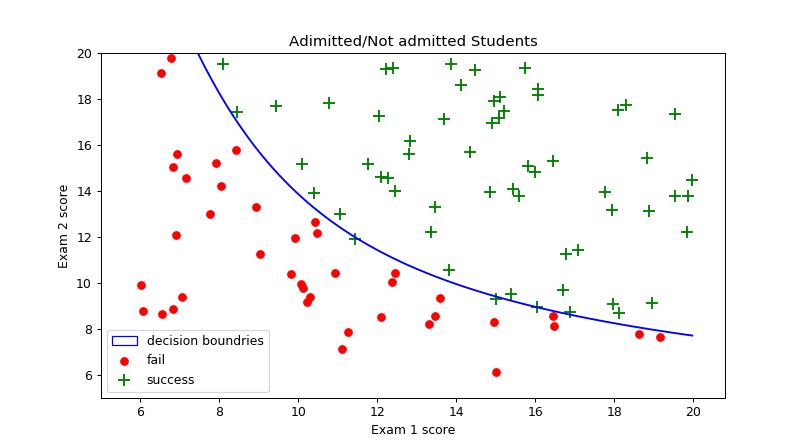

In [2]:
%matplotlib notebook
from matplotlib.patches import Rectangle

# calculate predection and train accuracy
#y_pred = sigmoid(np.dot(X,theta_opt))>=0.5
y_pred_train = np.dot(X_train,theta_opt)>=0    # ** your code here** 
train_accuracy = (y_pred_train[:,np.newaxis]==y_train).sum()/m_train*100    # ** your code here** 
print("The accuracy on the training data is:", train_accuracy,"%")

# calculate the mesh grid for contour plot
u1=np.linspace(5,20,100)
u2=np.linspace(5,20,100)
u1, u2 = np.meshgrid(u1, u2)

X3=np.ones((*u1.shape,1))
for i in range(1,degree+1):
    for j in range(i+1):
         X3 = np.concatenate((X3,u1[...,np.newaxis]**(i-j)*u2[...,np.newaxis]**j),axis=-1)

Z=np.dot(X3,theta_opt)

# plot descision boundries
plt.figure("Admission decision boundries",figsize=(9,5))
fail=plt.scatter(x_1_train[y_train==0], x_2_train[y_train==0],  color='red',label='fail')
success=plt.scatter(x_1_train[y_train==1], x_2_train[y_train==1],  color='green',marker='+',s=80,label='success')
plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')
plt.title('Adimitted/Not admitted Students')
ctr = plt.contour(u1, u2, Z,0,colors="blue")
extra = Rectangle((0, 0), 3, 4, fc="w", fill=False, edgecolor="b", linewidth=1)
plt.legend([extra,fail,success], ("decision boundries","fail","success"),loc='best')


<font color="blue">**Question 3: **</font>
- Load test data from "exams_test_data.txt" file in "students_results_test" variable and check its size. (use [loadtxt](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.loadtxt.html) function from numpy library).
- Calculate the test accuracy (number of good prediction/number of all student) on the test data and compare it with the train accuracy. Interpret the difference.

The accuracy on the test data is: 64.0 %


<IPython.core.display.Javascript object>


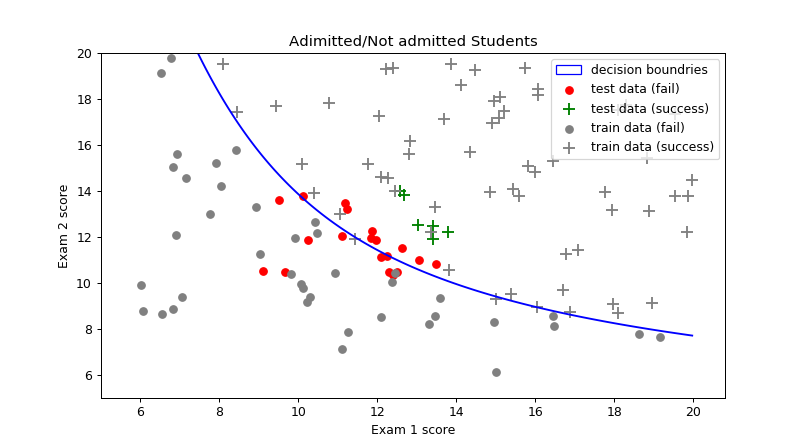

In [3]:
students_results_test = np.loadtxt('exams_test_data.txt',delimiter='\t')  # ** your code here** 

m_test = students_results_test.shape[0] # number of student in test data
x_1_test = students_results_test[:,0,np.newaxis] # we add np.newaxis in the indexing to obtain an array 
x_2_test = students_results_test[:,1,np.newaxis] # with shape (100,1) instead of (100,)
y_test = students_results_test[:,2,np.newaxis] # we add np.newaxis in the indexing to obtain an array with shape (100,1) instead of (100,)

# add polynomial features to the array data X
X_test=np.ones((m_test,1))   # initialize X array
X_test = Poly_Features(X_test,x_1_test,x_2_test,degree)

# calculate prediction and accuracy on test data
y_test_pred=np.dot(X_test,theta_opt)>=0   # ** your code here** 
test_accuracy = (y_test_pred[:,np.newaxis]==y_test).sum()/m_test*100   # ** your code here** 
print("The accuracy on the test data is:", test_accuracy,"%")

# plot descision boundries and test data
plt.figure("decision boundries and test data",figsize=(9,5))
fail=plt.scatter(x_1_test[y_test==0], x_2_test[y_test==0],  color='red')
success=plt.scatter(x_1_test[y_test==1], x_2_test[y_test==1],  color='green',marker='+',s=80)
fail_train=plt.scatter(x_1_train[y_train==0], x_2_train[y_train==0],  color='gray')
success_train=plt.scatter(x_1_train[y_train==1], x_2_train[y_train==1],  color='gray',marker='+',s=80)
plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')
plt.title('Adimitted/Not admitted Students')
ctr = plt.contour(u1, u2, Z,0,colors="blue")
plt.legend([extra,fail,success,fail_train,success_train], ("decision boundries","test data (fail)","test data (success)","train data (fail)","train data (success)"),loc='best')


<font color="green">**Notes: **</font>  
When we measure the accuracy on the training set we found a high value. This didn't mean necessarily that our model has a high performance. Since our model learn and tune its parameters on the training set hence it tends to well perform on this set. However, if we assess it on new and unseen data (like the test set) it won't have that performance.  

Consequently, if we want to estimate the performance of a model in general case we should evaluate it on a new test set. In fact, if we evaluate on the training set used for model training we will overestimate the real performance.  

### Underfitting and Overfitting

In this part we will study the effect of the number of features and the model complexity on the training phase and we will illustrate the underfitting and overfitting phenomena. We will use randomly generated data for a regression problem and we will try to use several models with different number of features (different polynomial features degrees). Then, we will see how well the model fits the training and the test data.

<font color="blue">**Question 4: **</font>
- Split the data ("x" and "y" vector) to training and test data with size "m_train" and "m_test" respectively. When the original data is sorted, you should choose the training and the test sets randomly to ensure that the two sets cover the possible values space in a best manner.  
**Hint:** You could use [random permutation](https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.permutation.html) function to generate a random permutation of "m" indices for "x" and "y" vectors. Then, you could select the first "m_train" indices to index train data from "x" and "y". You could use the rest of indices to index the test data.
- Use [PolynomialFeatures](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) class and [PolynomialFeatures.fit_transform](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html#sklearn.preprocessing.PolynomialFeatures.fit_transform) functions from numpy library to generate polynomial features of degree "i". This will generate automatically the features instead of adding them by hand as in the previous example with the implemented function "Poly_Features".

the size of training set is: 11 
the size of test set is: 4


<IPython.core.display.Javascript object>


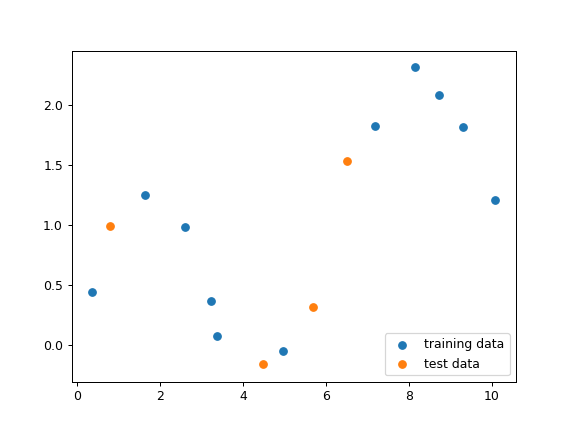

<IPython.core.display.Javascript object>


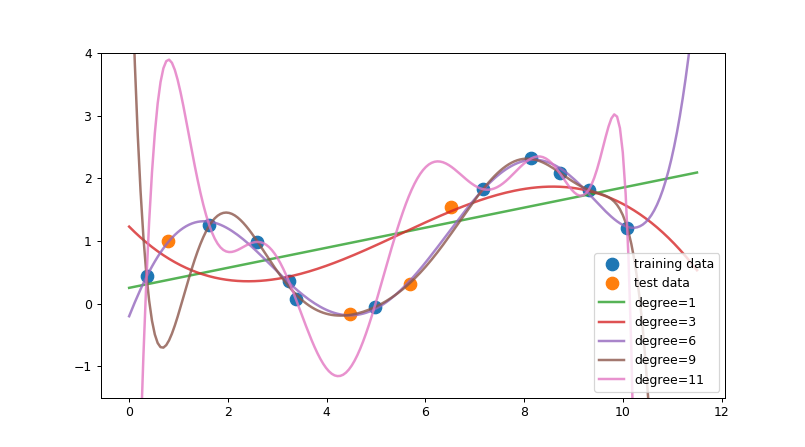

In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# generate random data
np.random.seed(0)
m = 15
x = np.linspace(0,10,m) + np.random.randn(m)/5
y = np.sin(x)+x/6 + np.random.randn(m)/10

# calculate the size of training and test sets
train_ratio = 0.75
m_train = int(round(train_ratio*m)) 
m_test = m-m_train
print("the size of training set is:",m_train,"\nthe size of test set is:",m_test)

# split the data to training and test sets
np.random.seed(9599)
rand_perm = np.random.permutation(m)  # ** your code here**
X_train=x[rand_perm[:m_train]]
y_train=y[rand_perm[:m_train]]
X_test=x[rand_perm[-m_test:]]
y_test=y[rand_perm[-m_test:]]

# visualize training and test set
plt.figure("training and test set")
plt.scatter(X_train, y_train, label='training data')
plt.scatter(X_test, y_test, label='test data')
plt.legend(loc="lower right")

# train several polynomial models
regr = LinearRegression()
deg=[1,3,6,9,11]
Poly_predict=np.zeros((len(deg),200))
for i in range(len(deg)):
    poly = PolynomialFeatures(deg[i])                 # ** your code here** 
    new_X = poly.fit_transform(X_train[:,np.newaxis])    # ** your code here** 
    regr.fit(new_X, y_train[:,np.newaxis])
    u = np.linspace(0,11.5,200)   # 
    new_U = poly.fit_transform(u[:,np.newaxis])
    Poly_predict[i,:]=regr.predict(new_U).transpose()

# visualize different polynomial models
plt.figure("different polynomial models",figsize=(9,5))
plt.plot(X_train, y_train, 'o', label='training data', markersize=10)
plt.plot(X_test, y_test, 'o', label='test data', markersize=10)
for i,degree in enumerate(deg):
    plt.plot(u, Poly_predict[i], alpha=0.8, lw=2, label='degree={}'.format(degree))
plt.ylim(-1.5,4)
plt.legend(loc="best")


<font color="green">**Notes: **</font>  

We note that the different polynomial models fit our data differently. For instance, the polynomial model with degree 1 (linear model) fits poorly our data. It doesn't explain a lot of variation in the data since it doesn't include enough features. We say that this is an **"underfitting"** or a **"high bias"** problem.  

On the other hand, when using higher order polynomial with degree 11, we note that the model go through all the points in training data. However, it is not a good fit for our data because it introduce a lot of variation and a lot of features and it doesn't generalize well for test data. This is called **"overfitting"** or **"high variance"** problem.  

In order to choose the best polynomial order that fits our data, we will have recourse to model selection techniques.

### Model Selection and Cross Validation
In this part, we will train several polynomial models. Then, we will assess their performance on the training and the test sets. Hence, we will choose  the model with best performance in both training and test set. However, the calculated performance on test data won't be a good estimation of the performance of our model in general case. In fact, our model order (polynomial degree) is fitted to the test data. Thus, it tends to perform better on test data than on a new data. Therefore, we introduce the cross validation data used for tuning model meta-parameters (polynomial degree, classification threshold...). Then, we will use the test data to estimate the performance of our model in general case.  

<font color="blue">**Question 5: **</font>
- Split the original data ("x" and "y" vector) to training, validation and test data with size "m_train", "m_val" and "m_test" respectively.  
**Hint:** You could use [random permutation](https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.permutation.html) function to generate a random permutation of "m" indices for "x" and "y" vectors. Then, you could select the first "m_train" indices to index train data from "x" and "y". Then, you can act similarly for validation and test sets.
- Calculate "train_error" and "val_error" mean squared error on training and validation set for each polynomial model with degree "i" (for loop counter).  
**Hint:** You could use [mean_squared_error](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html) function from sklearn library to evaluate the mean squared error between original "y" and "y_predicted".
- From the train and validation error graph and values, select the polynomial degree "best_poly_deg" that fit the best our data. Then, compare the training, validation and test error of this polynomial model. What do you notice?

the size of training set is: 9 
the size of validation set is: 3 
the size of test set is: 3


<IPython.core.display.Javascript object>


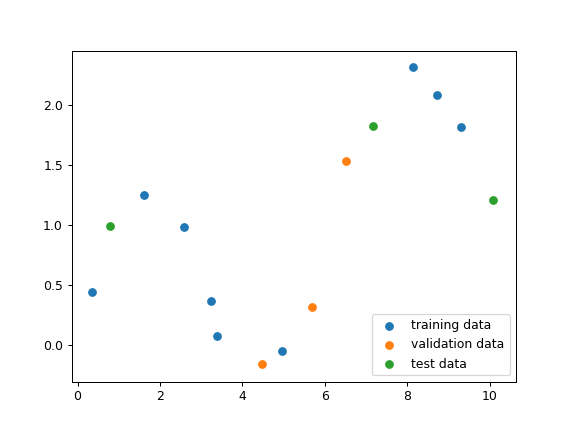

degree 0 polynomial has a train error: 0.70187 and validation error: 0.7281
degree 1 polynomial has a train error: 0.36089 and validation error: 0.7187
degree 2 polynomial has a train error: 0.23903 and validation error: 0.3202
degree 3 polynomial has a train error: 0.23769 and validation error: 0.3265
degree 4 polynomial has a train error: 0.01380 and validation error: 0.1592
degree 5 polynomial has a train error: 0.01223 and validation error: 0.0995
degree 6 polynomial has a train error: 0.00425 and validation error: 0.0199
degree 7 polynomial has a train error: 0.00100 and validation error: 0.1216
degree 8 polynomial has a train error: 0.00000 and validation error: 18.1801
degree 9 polynomial has a train error: 0.00000 and validation error: 47.8595
degree 10 polynomial has a train error: 0.00000 and validation error: 133.4477
degree 11 polynomial has a train error: 0.00000 and validation error: 426.7137


<IPython.core.display.Javascript object>


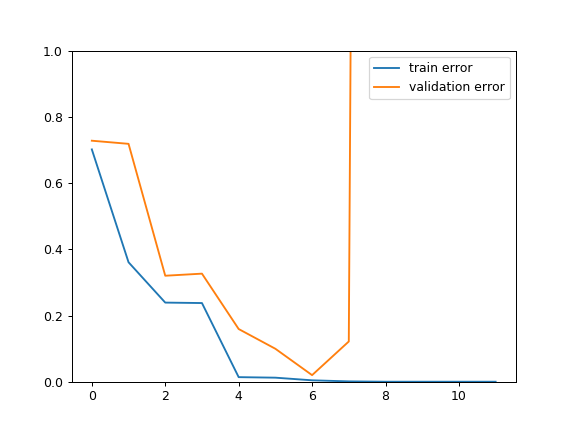

train error = 0.00424794120978 
validation error = 0.0198689465918 
test error = 1.6588795897


In [5]:
from sklearn.metrics.regression import mean_squared_error

# calculate the size of training, validation and test sets
train_ratio = 0.6
val_ratio = 0.2
m_train = int(round(train_ratio*m)) 
m_val = int(round(val_ratio*m)) 
m_test = m-m_train-m_val
print("the size of training set is:",m_train,"\nthe size of validation set is:",m_val,"\nthe size of test set is:",m_test)

# split data to training, validation and test sets
np.random.seed(5190969)
rand_perm = np.random.permutation(m)  # ** your code here**
X_train=x[rand_perm[:m_train]]
y_train=y[rand_perm[:m_train]]
X_val=x[rand_perm[m_train:m_train+m_val]]
y_val=y[rand_perm[m_train:m_train+m_val]]
X_test=x[rand_perm[-m_test:]]
y_test=y[rand_perm[-m_test:]]

# visualize training, validation and test sets
plt.figure("training, validation and test sets")
plt.scatter(X_train, y_train, label='training data')
plt.scatter(X_val, y_val, label='validation data')
plt.scatter(X_test, y_test, label='test data')
plt.legend(loc="lower right")

# train and assess several polynomial models
train_error = np.zeros((deg[-1]+1,)) 
val_error = np.zeros((deg[-1]+1,))

for i in range(deg[-1]+1):
    poly = PolynomialFeatures(i)
    new_X_train= poly.fit_transform(X_train[:,np.newaxis])
    new_X_val = poly.fit_transform(X_val[:,np.newaxis])
    regr.fit(new_X_train, y_train[:,np.newaxis])
    y_train_predicted = regr.predict(new_X_train)
    y_val_predicted = regr.predict(new_X_val)
    
    train_error[i] = mean_squared_error(y_train, y_train_predicted)  # ** your code here**
    val_error[i] = mean_squared_error(y_val, y_val_predicted)  # ** your code here**
    print("degree {} polynomial has a train error: {:.5f} and validation error: {:.4f}".format(i,train_error[i],val_error[i]))

# visualize error of each polynomial model
plt.figure("train and validation error of each polynomial model")  
plt.plot(range(deg[-1]+1),train_error[:deg[-1]+1],label="train error")
plt.plot(range(deg[-1]+1),val_error[:deg[-1]+1],label="validation error")
plt.ylim(0,1)
plt.legend(loc="best")

best_poly_deg = 6# ** your code here**
poly = PolynomialFeatures(best_poly_deg)
new_X_train= poly.fit_transform(X_train[:,np.newaxis])
new_X_test = poly.fit_transform(X_test[:,np.newaxis])
regr.fit(new_X_train, y_train[:,np.newaxis])
y_test_predicted = regr.predict(new_X_test)
test_error = mean_squared_error(y_test, y_test_predicted)
print("train error =",train_error[best_poly_deg],"\nvalidation error =",val_error[best_poly_deg],"\ntest error =",test_error)


<font color="green">**Notes: **</font>  
We note that the training error decrease when polynomial degree of our model increase. While the validation error decrease then increase again. In fact, when we add a lot polynomial features are added, the model will explain more variability in the data to the point of modeling noise it include (coming from measurement..). This make our model overfit the training data and didn't perform well on new data.  

Hence, we should choose the polynomial degree that minimize error on new data like validation set. However, the error calculated on validation set may overestimate the general error. In fact, the parameter "degree" is tuned on the validation set thus the selected model (degree = 6) will tends to perform better on this validation set than on new data (like test set) similarly to tuning theta parameters on training set. This error difference is quite visible on the train, validation and test error calculated at the end on the best selected model with degree=6.

In general, we should use the training set to fit our model. Then, if we have to select a model or to tune meta-parameters (like standard deviation, degree of model, regularization parameter $\lambda\dots$) we should use validation set. For evaluating the performance of our model in general case, we should use test set.


### Regularization

In this section, we will split the "Microchip" dataset into training and test sets. We will train a polynomial logistic classifier with and without regularization. Then, we will compare train and test accuracy in the two cases.  

The regularization helps to avoid the problem of overfitting by reducing or even making null $\theta_j's$ of non significant features. The idea is to include the sum of $\theta_j's$ in cost function in order to reduce them and remove useless features in our models.

The regularized cost function is equal to: $$J_{Reg}(\theta)= J(\theta)+\frac{\lambda}{2m}\times\sum_{j=1}^{n-1} \theta_j^2$$

The gradient of regularized cost function is equal to: 

$$\nabla J_{Reg}(\theta) = \begin{bmatrix}\frac{\partial J(\theta)}{\partial \theta_0}
\\ \frac{\partial J(\theta)}{\partial \theta_1}
\\ \vdots
\\ \frac{\partial J(\theta)}{\partial \theta_{n-1}}
\end{bmatrix}+\frac{\lambda}{m} \begin{bmatrix}0
\\ \theta_1
\\ \vdots
\\ \theta_{n-1}
\end{bmatrix}$$ 
where: $ \left\{\begin{matrix}
\frac{\partial J(\theta)}{\partial \theta_j} = \frac{1}{m} \sum_{i=1}^{m}{(h_\theta(x_i) - y)~x_j} ~~for~ j=0\dots n-1 
\\ h_\theta(x_i)=sigmoid(\theta^\top x_i)=\frac{1}{1+e^{-\theta^\top x_i}}
\end{matrix}\right.$
<font color="blue">**Question 6: **</font>
- Load data from "microchip.txt" file (use [loadtxt](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.loadtxt.html) function from numpy library).
- Split "X" and "Y" data into train and test sets with a size of 90% and 10% respectively.  
**Hint: ** You could use [train_test_split](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) function from sklearn library instead of generating random permutation by hand.
- Implement regularized cost and gradient function according to equations above.

In [54]:
from sklearn.model_selection import train_test_split

# load and extract data
microchip_data = np.loadtxt('microchip.txt',delimiter=',')  # ** your code here** 
m = microchip_data.shape[0] # number of mocrochips
x_1 = microchip_data[:,0,np.newaxis] # we add np.newaxis in the indexing to obtain an array 
x_2 = microchip_data[:,1,np.newaxis] # with shape (118,1) instead of (118,)
Y = microchip_data[:,2,np.newaxis] # we add np.newaxis in the indexing to obtain an array with shape (118,1) instead of (118,)

# split data to train and test sets
X_train, X_test, y_train, y_test = train_test_split(np.concatenate((x_1,x_2),axis=1), Y, test_size=0.1, random_state=0)
# ** your code here** 

def Reg_cost_func(theta):
    # ** your code here** 
    J=np.sum(-y*np.log(sigmoid(np.dot(X,theta[:,np.newaxis]))))-np.sum((1-y)*np.log(1-sigmoid(np.dot(X,theta[:,np.newaxis]))))+lambda_/2*np.sum(theta[1:]**2)
    return J/m  

def Reg_grad_cost_func(theta):
    # ** your code here** 
    g=(1/m)*(np.dot(X.transpose(),(sigmoid(np.dot(X,theta[:,np.newaxis]))-y))+lambda_*np.concatenate((np.zeros((1,1)),theta[1:,np.newaxis]),axis=0))  # this is the vectorized implementation
    g.shape=(g.shape[0],)
    return g  

# model meta-parameters
degree=8    # degree of polynomial features
lambda_=160      # regularization coefficient 
print("The degree of the polynomial model is:",degree,"\nThe regularization coefficient \u03BB is:",lambda_," (no regularization)" if (lambda_==0) else "")  #\u03BB is the unicode caractère lambda

# add polynomial features to the train data
x_1_train = X_train[:,0,np.newaxis] 
x_2_train = X_train[:,1,np.newaxis]
y=y_train

X=np.ones((X_train.shape[0],1))   # initialize X array
X = Poly_Features(X,x_1_train,x_2_train,degree)
n = X.shape[1]

# calculate optimal theta
theta0=np.zeros((n,))
theta_opt = fmin_bfgs(Reg_cost_func,theta0,fprime=Reg_grad_cost_func,disp=0) 


The degree of the polynomial model is: 8 
The regularization coefficient λ is: 160 


<font color="blue">**Question 7: **</font>
- Calculate the train and test accuracies. 
- In the previous block of code, vary the values of "degree" (between 2-8) and the values of lambda (between 0: no regularization to 100: a lot of regularization. You could try also 0.1, 1, 10... values). What is the effect of regularization and lambda parameters?
- Compare the value of train and test accuracy in the case with regularization (lambda=0.1 or 1) and without (lambda=0).

The accuracy on the training data is: 55.6603773585 %
The accuracy on the test data is: 50.0 %


<IPython.core.display.Javascript object>


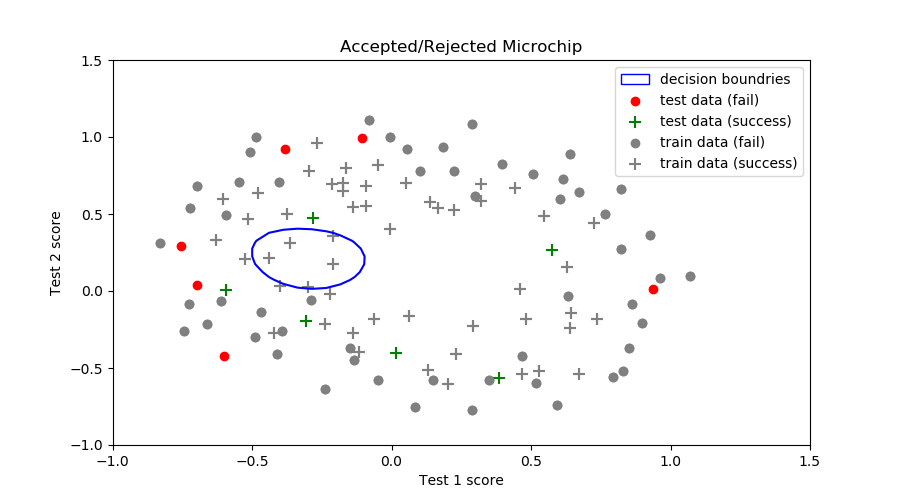

In [55]:
# calculate train accuracy
y_train_pred = np.dot(X,theta_opt)>=0   # ** your code here** 
train_accuracy = (y_train_pred[:,np.newaxis]==y_train).sum()/y_train.shape[0]*100   # ** your code here** 
print("The accuracy on the training data is:", train_accuracy,"%")

# add polynomial features to the test data  
x_1_test = X_test[:,0,np.newaxis] 
x_2_test = X_test[:,1,np.newaxis]
X_test_poly=np.ones((X_test.shape[0],1))   # initialize X_test_poly array
X_test_poly = Poly_Features(X_test_poly,x_1_test,x_2_test,degree)

# calculate test accuracy
y_test_pred = np.dot(X_test_poly,theta_opt)>=0   # ** your code here** 
test_accuracy = (y_test_pred[:,np.newaxis]==y_test).sum()/y_test.shape[0]*100   # ** your code here** 
print("The accuracy on the test data is:", test_accuracy,"%")

# calculate the mesh grid for contour plot
u1=np.linspace(-1,1.5,50)
u2=np.linspace(-1,1.5,50)
u1, u2 = np.meshgrid(u1, u2)
X3=np.ones((*u1.shape,1))
for i in range(1,degree+1):
    for j in range(i+1):
         X3 = np.concatenate((X3,u1[...,np.newaxis]**(i-j)*u2[...,np.newaxis]**j),axis=-1)
Z=np.dot(X3,theta_opt)

# plot descision boundries
plt.figure("Microchip decision boundries",figsize=(9,5))
fail=plt.scatter(x_1_test[y_test==0], x_2_test[y_test==0],  color='red',label='fail')
success=plt.scatter(x_1_test[y_test==1], x_2_test[y_test==1],  color='green',marker='+',s=80,label='success')
fail_train=plt.scatter(x_1_train[y_train==0], x_2_train[y_train==0],  color='gray',label='fail')
success_train=plt.scatter(x_1_train[y_train==1], x_2_train[y_train==1],  color='gray',marker='+',s=80,label='success')
fail_train=plt.scatter(x_1_train[y_train==0], x_2_train[y_train==0],  color='gray',label='fail')
success_train=plt.scatter(x_1_train[y_train==1], x_2_train[y_train==1],  color='gray',marker='+',s=80,label='success')
plt.xlabel('Test 1 score')
plt.ylabel('Test 2 score')
plt.title('Accepted/Rejected Microchip')
ctr = plt.contour(u1, u2, Z,0,colors="blue")
plt.legend([extra,fail,success,fail_train,success_train], ("decision boundries","test data (fail)","test data (success)","train data (fail)","train data (success)"),loc='best')


<font color="green">**Notes: **</font> 

When there is no regularization ($\lambda=0$) and the polynomial degree is not too high (between 2 and 4), we note that the decision boundary is not very complex. It is similar to an ellipsis. We note also that the train accuracy (around 81%) is less than the test accuracy (around 91%) because there is no overfitting when the number of feature is not too high. In addition the size of test set is not enough large to make a good estimation of the accuracy. In fact we should get a test accuracy close to the train accuracy if the test set size was enough large.  

In the other hand, a high polynomial degree model (between 6 and 8) will generate a complex form decision boundary that try include extreme point in success domain. In this case, the train accuracy is much higher (around 91%) than the test accuracy (around 66%). This is due to the overfitting problem. In order to solve this problem we can use regularization and set $\lambda$ to a value higher than 0. For $\lambda = 0.1$ the decision boundary become simpler than the case without regularization and we get an accuracy between 80% and 90%. However, if we increase $\lambda$ a lot (more than 10, and up to 150) we note that the cost function is more affected by the value of theta parameters than by the prediction error. Hence, our model will try to minimize all theta parameters regardless the number of misclassification done. Consequently, the decision boundary will have small ellipsis form and the performance will decrease dramatically.  
However, accuracy will stay around 50% because we have approximately as success as fail example on our data set. Even with very small decision boundary that cause "fail" prediction all time we will get around 50% of good prediction. We will study more details about this problem when seeing skewed data classes.